In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import sounddevice as sd

# Trabajo práctico II - Felipe Sánchez
## Fundamentos matemáticos del procesamiento de señales

## 1. Generación y muestreo de señales

En esta sección generaremos algunas señales digitales y veremos el efecto del muestreo en términos de reconstrucción. Finalmente, veremos cómo generar señales de audio y guardarlas en formato _.wav_.

### 1.1 Generación de señales

Generaremos muestras a partir de la siguiente señal continua

$$x(t) = \sin (2\pi f_0 t) + \cos(2\pi f_1 t)$$

donde $f_0 = 2Hz$ y $f_1 = 3f_0$.


**1.-** Implemente una función def x(t) que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [2]:
# Definimos nuestras frecuencias
f_0 = 2 #Hz
f_1 = 3*f_0 # Hz

def x(t):
    return np.sin(2*np.pi*f_0*t) + np.cos(2*np.pi*f_1*t)

**2.-** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000Hz$ sobre $N_0 = 1024$ muestras 

* Genere un arreglo $t_0$ de N muestras temporales de valores $t=\frac{n}{f_{s0}}$.

* Evalue la función x en el vector de tiempo $t_0$ y almacene los valores resultantes $x[n]$ en un vector $x_0$.

* Trace la señal con el eje de tiempo correcto en segundos.

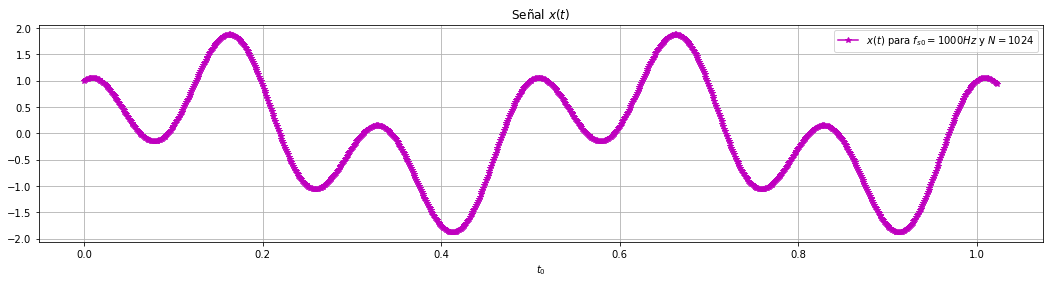

In [3]:
f_s0 = 1000 #Hz
N = 2**10 

# Creamos arreglo temporal de tamaño N con saltos de 1/f_s0
t_0 = np.arange(0,N/f_s0,1/f_s0)
# Evaluamos el vector de tiempo en nuestra señal definida
x_0 = x(t_0)
# Graficamos la señal
plt.figure(figsize = (18,4))
plt.title('Señal $x(t)$')
plt.xlabel('$t_0$')
plt.plot(t_0,x_0,'m-*', label = '$x(t)$ para $f_{s0} = 1000 Hz$ y $N = 1024$')
plt.legend()
plt.grid();

**3.-** Genere una señal $x_n$ con una frecuencia de muestreo $f_s = 20Hz$ sobre $N = f_s$ Muestras (Muestreo de 1 segundo).

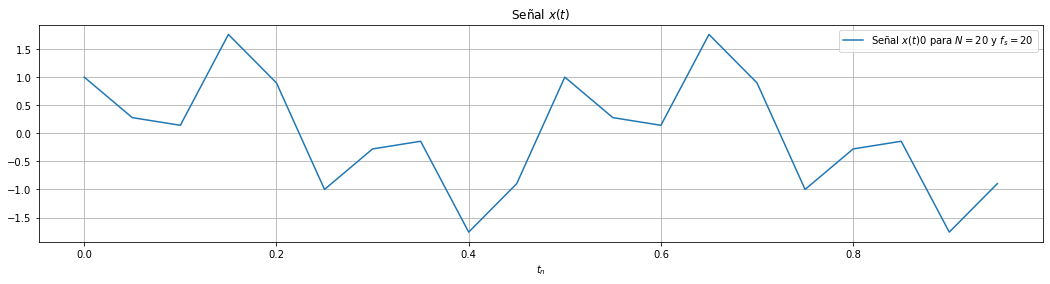

In [4]:
f_s = 20
# Creamos vector de tiempo indicado
t_n = np.arange(0,1,1/f_s)
# Cargamos nuestra señal
x_n = x(t_n)
# Graficamos

plt.figure(figsize = (18,4))
plt.title('Señal $x(t)$')
plt.xlabel('$t_n$')
plt.plot(t_n,x_n,label = 'Señal $x(t)0$ para $N = 20$ y $f_s = 20$')
plt.legend()
plt.grid()

**4.-** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado "-o" para ver la posición de las muestras.

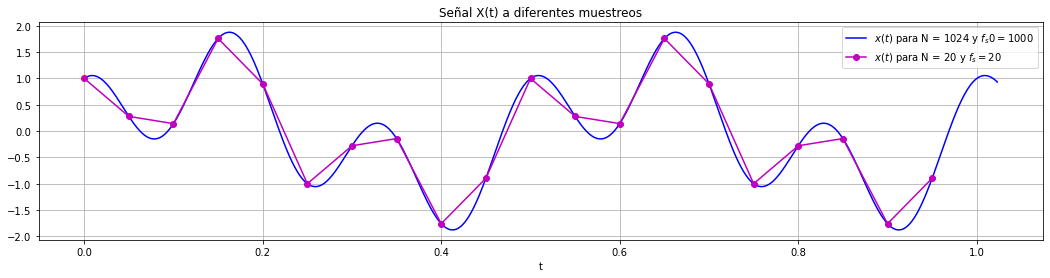

In [5]:
plt.figure(figsize = (18,4))
plt.title('Señal X(t) a diferentes muestreos')
plt.xlabel('t')
plt.plot(t_0,x_0,'-b',label = '$x(t)$ para N = 1024 y $f_s0 = 1000$')
plt.plot(t_n,x_n,'m-o',label = '$x(t)$ para N = 20 y $f_s = 20$')
plt.legend()
plt.grid()

### 1.2 Reconstrucción de señales.

**1.-** ¿Cuál es la frecuencia de muestreo necesaria $f_s$ para garantizar que la señal $x(t)$ pueda reconstruirse?



Para poder encontrar la frecuencia $f_s$ necesaria debemos reconocer la transformada de Fourier de nuestra señal

$$x(t) = \sin(4\pi t) + \cos(12\pi t)$$

Siendo,

$$\hat{x} (\omega) = i\pi (\delta (\omega + 4\pi)-\delta(\omega - 4\pi)) + \pi (\delta (\omega -12\pi)+\delta (\omega +12\pi))$$


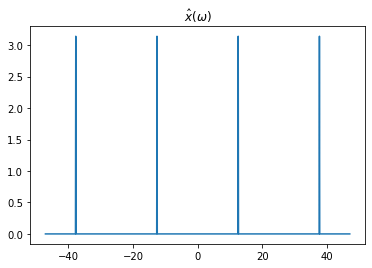

In [6]:
# Graficamos esta transformada de fourier
L = 15*np.pi
w = np.linspace(-L,L,N)
n_w1 = int((L+4*np.pi)*N/(2*L))
mn_w1 = int((L-4*np.pi)*N/(2*L))
n_w2 = int((L+12*np.pi)*N/(2*L))
mn_w2 = int((L-12*np.pi)*N/(2*L))
# Ingresamos transformada de Fourier
xhat = 1j*np.pi*(signal.unit_impulse(N,mn_w1) - signal.unit_impulse(N,n_w1)) + np.pi*(signal.unit_impulse(N,n_w2) + signal.unit_impulse(N,mn_w2))

plt.plot(w,abs(xhat))
plt.title('$\hat{x}(\omega)$');

Ahora note que la frecuencia angular mayor necesaria para tener valores no nulos es de $w = \pm 12\pi$, entonces para que la señal pueda ser reconstruida bajo el Teorema de Nysquit - Shannon necesitamos que $\hat{x}(\omega)$ posea soporte compacto dentro de $[-\pi / T,\pi / T]$ (donde $T$ es el paso entre muestras). En particular, dicho soporte compacto es $[-12\pi,12\pi]$. Lo que es equivalente a tener 

$$\frac{\pi}{T} = \pi f_s = 12\pi$$

Determinando que la frecuencia de muestreo necesario para reconstruir la señal $x(t)$ está dada por $f_s = 12Hz$.

**2.-** Programe una función def recSinc($x_s$,$t_s$,$f_s$,t) que reconstruya la señal en el tiempo $t$ a partir de muestras $x_s$, $t_s$ a la frecuencia $f_s$

Recordamos que dada las condiciones anteriores, la señal será reconstruida por

$$f(t) = \displaystyle\sum_{n\in\mathbb{Z}}f(nT)\sin c\left(\dfrac{\pi}{T}(t-nT))\right)$$

In [7]:
# Reconstruiremos la señal en el primer segundo.
def recSinc(xs,ts,fs,t):
    rec = []
    for i in t:       
        np.array(rec.append(np.sum(xs*np.sinc(np.pi*fs*(i-ts)))))
    return rec

**3.-** Grafique simultáneamente $x_0$ y la interpolación de $x_n$ en $t_0$. ¿Qué pasa en el borde de la ventana de muestreo?

FALTA VER QUE PASA EN EL BORDE

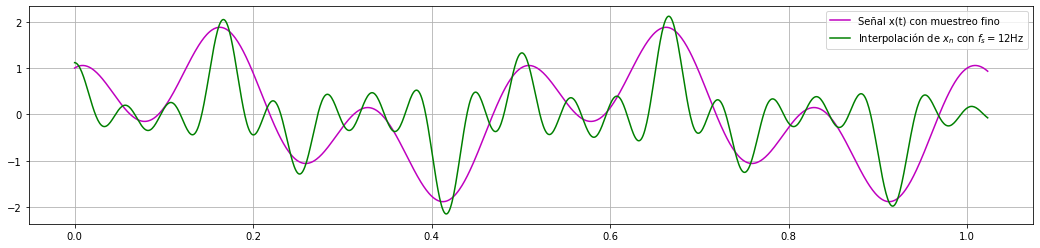

In [8]:
# Previo a graficar, sobreescribiremos nuestros valores para las necesidades de nuestro problema
f_s = 12
t_n = np.arange(0,1,1/f_s)
x_n = x(t_n)
# Graficamos
plt.figure(figsize = (18,4))
plt.plot(t_0,x_0,'m-', label = 'Señal x(t) con muestreo fino')
plt.plot(t_0,recSinc(x_n,t_n,f_s,t_0),'g-', label = 'Interpolación de $x_n$ con $f_s = 12$Hz')
plt.legend()
plt.grid();

A partir de esta frecuencia de muestreo se comienza a observar que la interpolación aproxima de buena manera los comportamientos de la señal original, moviéndose armoniosamente en función de las amplitudes de $x(t)$. 
Por otro lado, notamos que para una frecuencia de muestreo lo suficientemente grande tendremos una interpolación más precisa. Veremos lo que ocurre para $f_s = 1000$Hz.

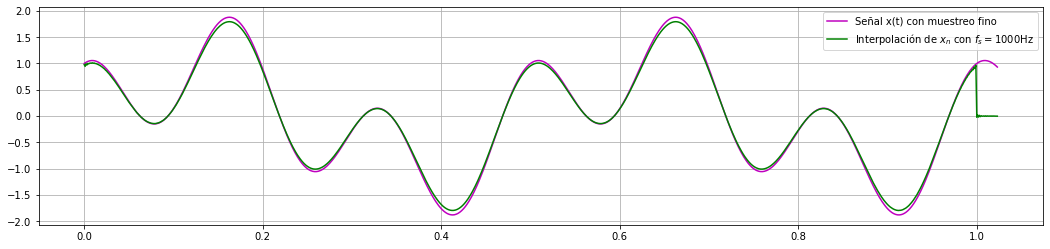

In [9]:
f_s = 1000
t_n = np.arange(0,1,1/f_s)
x_n = x(t_n)
# Graficamos
plt.figure(figsize = (18,4))
plt.plot(t_0,x_0,'m-', label = 'Señal x(t) con muestreo fino')
plt.plot(t_0,recSinc(x_n,t_n,f_s,t_0),'g-', label = 'Interpolación de $x_n$ con $f_s = 1000$Hz')
plt.legend()
plt.grid();

Ahora notamos que en el borde de la ventana de muestreo, llega un momento en que $t-nT >0$ para todo $t>1$. Esto significa que en la combinación lineal de senos cardinales, en la fórmula encontrada de reconstrucción de una señal, siempre sumaremos valores en una vecindad pequeña de 0. Observe además que este cambio brusco es proporcional a la magnitud de la frecuencia de muestreo

**4.-** Modifique la frecuencia de muestreo de $f_s = 20$ a $f_s =10$. ¿Qué sucede con la reconstrucción?

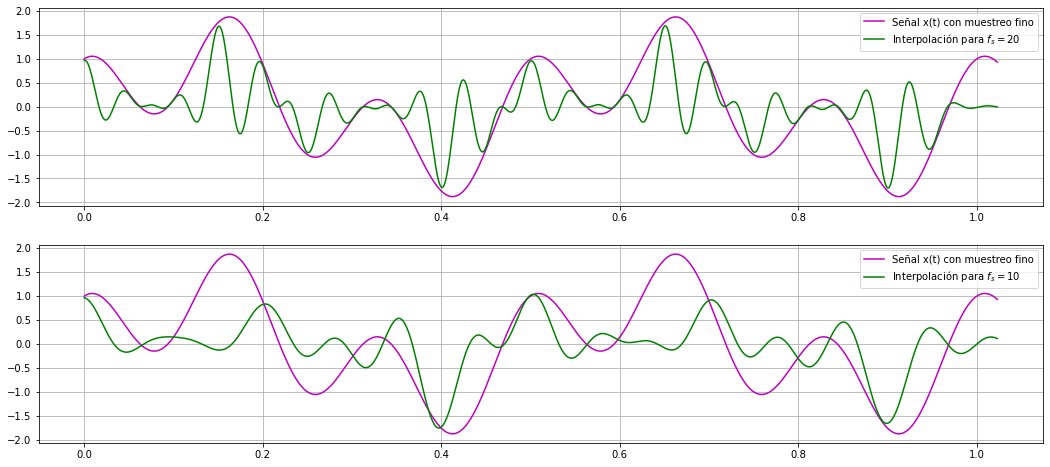

In [10]:
# Creamos directamente nuestras reconstrucciones con las frecuencias pedidas.
t_20 = np.arange(0,1,1/20)
x_20 = x(t_20)
t_10 = np.arange(0,1,1/10)
x_10 = x(t_10)
rec_20 = recSinc(x_20,t_20,20,t_0)
rec_10 = recSinc(x_10,t_10,10,t_0)

fig, ax = plt.subplots(2,1,figsize = (18,8))

o1 = ax[0].plot(t_0,x_0,'m-', label = 'Señal x(t) con muestreo fino')
o1 = ax[0].plot(t_0,rec_20,'g-',label = 'Interpolación para $f_s = 20$')

o2 = ax[1].plot(t_0,x_0,'m-', label = 'Señal x(t) con muestreo fino')
o2 = ax[1].plot(t_0,rec_10,'g-',label = 'Interpolación para $f_s = 10$')

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid();


Es importante notar que para una frecuencia de muestro de $f_s = 10$Hz no sigue de buena manera una reconstrucción (desface y no respeta magnitudes por la superposición de monticulos en su espectro) de $x(t)$ dado que dicha frecuencia es menor a la requerida de 12Hz. En cambio, para $f_s = 20 >12$Hz notamos la tendencia de la interpolación a respetar la señal original.

### 1.3 Generación de señales de audio

**1.-** Genere 1 segundo de onda sinusoidal de magnitud 0.5 y de frecuencia $f_0 = 425 Hz$ muestreada a $f_s = 8000Hz$. Guárdelo como archivo wave y escuche el archivo o escuche directamente la señal desde python. Este es el tono de marcado de los teléfonos europeos.

In [11]:
# Ingresamos nuestros valores
A = 0.5
f_0 = 425 #Hz
f_s = 8000 #Hz
t_0 = np.arange(0,1,1/f_s) # Arreglo de tiempo de muestreo
# Creamos la señal
señal_e = A*np.sin(2*np.pi*f_0*t_0) # 1 segundo de señal
tono_eu = waves.write("tono_eu.wav", 1,señal_e.astype(np.int16)) # Guardamos la señal como archivo .wav
# Reproducimos el sonido
sd.play(señal_e,f_s)
sd.wait()

Es posible generar notas musicales a partir de su número MIDI $m$ donde la frecuencia se expresa como

$$f_m = 440\cdot 2^{\dfrac{m-69}{12}}$$

Vemos que hay doce semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es $A4$ en notación y es el estándar de tono para afinar instrumentos para conciertos.

Implemente una función def getNote(m,fs,l) que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

In [12]:
def getNote(m,fs,l):
    f_m = 440*2**((m-69)/12)
    t = np.arange(0,l,1/fs)
    señal = np.sin(2*np.pi*f_m*t)
    #Reproducimos
    sd.play(señal,fs)
    sd.wait()
    return señal

**3.-** Guarde la nota $m = 69$ en un archivo llamado "A4.wav". Escuche varias otras notas MIDI. ¿Qué pasa para $m = 117$ ($A8$) cuando se guarda a la frecuencia e muestreo $f_s = 8000 Hz$?

In [13]:
# Guardamos la nota midi m = 69
A4 = waves.write("A4.wav",1,getNote(69,8000,1).astype(np.int16))

In [14]:
#Escuchamos otras notas midi considerando la escala pentatónica mayor de C.
# muestreo

getNote(60,44100,0.5)  #C4
getNote(62,44100,0.5)  #D4
getNote(64,7000,0.5)   #E2
getNote(67,9000,0.5)   #G5
getNote(69,6000,0.5)   #A4
getNote(67,9000,0.5) 
getNote(64,7000,0.5)
getNote(62,44100,0.5) 
getNote(60,44100,0.5);


In [15]:
# Veamos lo que ocurre para m = 117 (A8) cuando se guarda a una frecuencia de muestre f_s = 8000 Hz
getNote(117,8000,1);

Observamos que la nota midi $m = 117$ (A8) se corresponde a cuatro octavas más arriba que $m= 69$ (A4), puesto que es detectable al oido y se satisface la relación

$$f_{117} = 440\cdot2^{4} = 2^{4}\cdot f_{69}$$

**4.-** Codifique una secuencia de concatenación de notas [70,72,68,56,63] (1 seg cada una) y guarde la secuencia como archivo "sec.wav".¿Le suena la secuencia?


In [16]:
# Guardamos la secuencia
sec = waves.write("sec.wav",5,np.concatenate([getNote(m,44100,1) for m in [70,72,68,56,63]]).astype(np.int16))

La verdad no me suena la secuencia, pero aquí se codifica la secuencia del silvido de Los juegos del hambre - Sinsajo

In [18]:
Sinsajo = waves.write("Sinsajo.wav",4,np.concatenate([getNote(m,44100,0.8) for m in [79,82,81,74]]).astype(np.int16))

**5.-** La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto de la saturación puede ser reproducido usando un "clipeo" en un seno.

Compare la señal de la nota $m = 69$ a $440 Hz$ para diferentes valores de recorte. Guarde la nota usando el "clipeo" en un archivo "A4clip.wav". ¿Cuál es el efecto de la saturación en el contenido frecuencial de la señal?

In [19]:
# Guardamos la nota MIDI m = 69 durante 2 segundos
A = getNote(69,44100,2) 
# Hacemos el "clipeo" a partir del 30% de la señal transcurrida
A[26460:88200] = 50*A[26460:88200]
# Guardamos esta señal clipeada en un archivo .wav
A4clip = waves.write("A4clip.wav",2,A.astype(np.int16))

In [20]:
# Reproducimos la nota clipeada
sd.play(A,44100)
sd.wait()

Note que a partir del 30% del audio la señal está saturada dado que "el amplificador alcanzó su máxima amplitud" (supuesta como 50 en el código), esto produce una distorsión auditiva en la señal. 

In [21]:
# otro ejemplo para una señal más pura de frecuencias más bajas
B = getNote(40,44100,2)
B[24000:88200] = 3*B[24000:88200]

sd.play(B,44100)
sd.wait()

**6.-** Genere la señal

$$x(t) = \sin\left(2\pi\left(\omega_0t + \dfrac{c}{2}t^{2}\right)\right)$$

con $f_0 = 100$Hz y $c = 500$ durante 1 segundo a una frecuencia de muestreo $f_s = 8000$Hz. Esta señal es llamada "chrip" y corresponde a una modulación de frecuencia. Guarde la señal en el archivo "chirp.wav"

In [22]:
f_0 = 100 #Hz
c = 500
f_s = 8000 #Hz
t = np.arange(0,1,1/f_s)
x_t = np.sin(2*np.pi*(2*np.pi*f_0*t + (c/2)*t**2))
# Guardamos el archivo .wav de la señal
chrip = waves.write("chrip.wav",1,x_t.astype(np.int16))
# Reproducimos el sonido
sd.play(x_t,f_s)
sd.wait()